In [70]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats

In [123]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def calc_intervals(data):
    n_trials = data.shape[1]
    _mean = np.zeros(n_trials)
    _min = np.zeros(n_trials)
    _max = np.zeros(n_trials)
    
    for i in range(n_trials):
        h_mean, h_min, h_max = mean_confidence_interval(
            data[:,i], confidence=0.95
        )
        if h_min <= 0:
            h_min = np.abs(h_min)
            if _min[i-1] <= h_min:
                h_min = _min[i-1]
        _mean[i], _min[i], _max[i] = h_mean, h_min, h_max
    return _mean, _min, _max

def plot_data(df, color="b", color2="k", label="human"):
    data = np.array(df.T)
    _mean, _min, _max = calc_intervals(data)
    plt.plot(range(30), _mean, color=color, lw=1, label=label)
    plt.fill_between(range(30), _max, _min, alpha=0.3, color=color2)

In [124]:
df_human = pd.read_csv("./human_expert.csv", index_col=0)
df_random = pd.read_csv("./random.csv", index_col=0)
df_model = pd.read_csv("./best.csv", index_col=0)

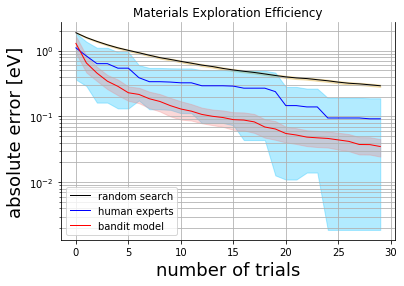

In [127]:
# global optimal
plot_data(df_random, color="k", color2="goldenrod", label="random search")
plot_data(df_human, color="b", color2="deepskyblue", label='human experts')
plot_data(df_model, color="r", color2="lightcoral", label="bandit model")
#plt.axhline(y=0.0004, color='k', linestyle="dashed")

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.set_yscale('log')
plt.title('Materials Exploration Efficiency')
plt.xlabel('number of trials',fontsize=18)
plt.ylabel('absolute error [eV]',fontsize=18)
plt.grid(which="both")
plt.legend(loc='lower left')
plt.savefig("efficiency.png")
plt.show()